# Churning Customers
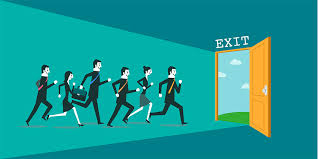

A manager at the bank is disturbed with more and more customers leaving their credit card services. So let's predict who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

# Importing The Packages

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import copy
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import plotly
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
plotly.offline.init_notebook_mode (connected = True)

# Reading The data

In [ ]:
data=pd.read_csv('../input/credit-card-customers/BankChurners.csv')

# Having  First look at the data

In [ ]:
data.drop(columns=data.columns[-2:],inplace=True)

In [ ]:
data.head()

In [ ]:
data.info()

# Checking For Null Values

In [ ]:
data.isna().sum()

## There are absolutely no Nan values in this dataset

# Preprocessing The Dataset

In [ ]:
data.drop('CLIENTNUM',axis=1,inplace=True)

Converting all the categorical columns to numerical using Label Encoder

In [ ]:
# Making a copy of the data to not make changes in the original file
df=copy.deepcopy(data)

In [ ]:
# Finding all the categorical columns from the data
categorical=df.select_dtypes(exclude=['int64','float64']).columns

In [ ]:
categorical

In [ ]:
for i in categorical:
    df[i]=pd.factorize(df[i])[0]

# Let's have a look at heat map of df

In [ ]:
x=list(df.corr().columns)
y=list(df.corr().index)
values=np.array(df.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

Well from this we can clearly see that the status of a customer either existing or attrited is closely related to the number of months he was inactive and the number of contacts he made in the past year . So one of the methods to indulge them would be keeping them active by providing some kind of offers which will attract them to use the card  more .

We also see a negative impact of change in transaction count on the attrition flag :{

# Trying the model without oversampling

## Since the number of churned customers are too low it will effect the model.... Let's see

In [ ]:
X=df.drop('Attrition_Flag',axis=1).values
y=df['Attrition_Flag'].values

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=20,shuffle=True)

# Trying out Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
print('the accuracy of the model is:',accuracy_score(y_test,rf.predict(X_test))*100,'%')

## Making a confusion matrix

In [ ]:
cf=metrics.confusion_matrix(y_test,rf.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
print(metrics.classification_report(y_test,rf.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,rf.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,rf.predict(X_test))*100,'%')

# Let's Try XBGClassifier now 

In [ ]:
xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
print('The accuracy score using the XGBClassifier is :',accuracy_score(y_test,xgb.predict(X_test))*100,'%')

## Making Confusion Matrix

In [ ]:
cf=metrics.confusion_matrix(y_test,xgb.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
# Now let's have a look at the report
print(metrics.classification_report(y_test,xgb.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,xgb.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,xgb.predict(X_test))*100,'%')

### Wow XGBClassifier is a lot better than the Random Forest Classifier :)

# Trying out LGBMClassifier now

In [ ]:
lgbm=LGBMClassifier()

In [ ]:
lgbm.fit(X_train,y_train)

In [ ]:
print('The accuracy score of the LGBMClassifier is ',accuracy_score(y_test,lgbm.predict(X_test))*100,'%')

## Making the confusion Matrix

In [ ]:
cf=metrics.confusion_matrix(y_test,lgbm.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test,lgbm.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,lgbm.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,lgbm.predict(X_test))*100,'%')


## WoW this was better than the XGBClassifier but now we need to try something better to increase this score :|

# Since the number of churned customers are less we need to increase it by oversampling

In [ ]:
# Before
one_count=0
zero_count=0
for i in y:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.2, random_state=20,shuffle=True)

In [ ]:
# Trying out oversampling
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train2, y_train2)

In [ ]:
# After
one_count=0
zero_count=0
for i in y_train:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

After oversampling we got both the 1 and 0 in the same amount let's try our model now :)

# Trying out LGBMClassifier on the oversampled data

In [ ]:
lgbm2=LGBMClassifier()

In [ ]:
lgbm2.fit(X_train2,y_train2)

In [ ]:
print('The accuracy score of the model is :',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')

## Confusion Matrix

In [ ]:
cf=metrics.confusion_matrix(y_test2,lgbm2.predict(X_test2), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test2,lgbm2.predict(X_test2), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')
print('Recall:',metrics.recall_score(y_test2,lgbm2.predict(X_test2))*100,'%')


# OMG The Accuracy is 97.1% now . WOW!!

# Let's try SMOTEEN Now 

Class to perform over-sampling using SMOTE and cleaning using ENN.

Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=21)

In [ ]:
lgbm3=LGBMClassifier()

In [ ]:
# Before
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

In [ ]:
sme = SMOTEENN(random_state=21)

In [ ]:
X_train3,y_train3=sme.fit_resample(X_train3,y_train3)

In [ ]:
# After
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

In [ ]:
lgbm3.fit(X_train3,y_train3)

In [ ]:
print('the accuracy score using this is :',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')

# Confusion Matrix



In [ ]:
cf=metrics.confusion_matrix(y_test3,lgbm3.predict(X_test3), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test3,lgbm3.predict(X_test3), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')
print('Recall:',metrics.recall_score(y_test3,lgbm3.predict(X_test3))*100,'%')


# Let's make a pipeline using Borderline SMOTE and RandomUnderSampling


Borderline smote is a variant of SMOTE and is used to detect the borderline samples :)

In [ ]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=21)

In [ ]:
# Before
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

In [ ]:
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train3, y_train3 = pipeline.fit_resample(X_train3,y_train3)

In [ ]:
# After
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

This will decrease the overfitting in the data :)

In [ ]:
lgbm3=LGBMClassifier()

In [ ]:
lgbm3.fit(X_train3,y_train3)

In [ ]:
print('The accuracy score of this model is :',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')

In [ ]:
cf=metrics.confusion_matrix(y_test3,lgbm3.predict(X_test3), labels=[1,0])
sns.heatmap(cf,annot=True)

In [ ]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test3,lgbm3.predict(X_test3), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')
print('Recall:',metrics.recall_score(y_test3,lgbm3.predict(X_test3))*100,'%')

#### The accuracy of the model decreased but we can clearly see the increase in the recall from earlier :)

# So the best results were using Pipeline of Over and Undersampling giving better accuracy and recall results :)

# Hope you liked the file :) 

# Thank you :)

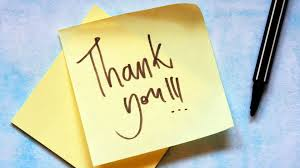